Decision Trees & Random Forests
We are going to predict once again if a passenger on the Titanic is going to survive. This time  using decision trees and random forests:

1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree.

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(at least two parameters).

4. Calculate the new accuracy and compare it with the previous results.

5. Use a random forest then change the number of estimators.

6. Calculate the new accuracy and compare it with the previous result.


In [115]:
# Task 1

import pandas as pd
import csv
from sklearn.model_selection import train_test_split

titanic_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic-passengers.csv', sep = ';')

titanic_data.head()

PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S

In [116]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [117]:
titanic_data['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [118]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [119]:
age = []
td = titanic_data['Age']
for i in td:
  age.append(int(i))

titanic_data['Age'] = age

In [120]:
missing_values = titanic_data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [121]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'])

In [122]:
titanic_data.head()

PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  Sex_female  \
0   28      0      0      248740  13.0000    NaN        S           0   
1   25      0      0      348123   7.6500  F G73        S           0   
2   20      0      0      350050   7.8542    NaN        S           0   
3   29      0      4      349909  21.0750    NaN        S           1   
4   31      1      0  F.C. 12750  52.0000    B71        S           0   

   Sex_male  
0         1  
1         1  
2         1  
3         0  
4         1

In [123]:
features = ['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch']
X = titanic_data[features]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

plt.figure(figsize=(135, 90))
plot_tree(dt_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=10)
plt.show()

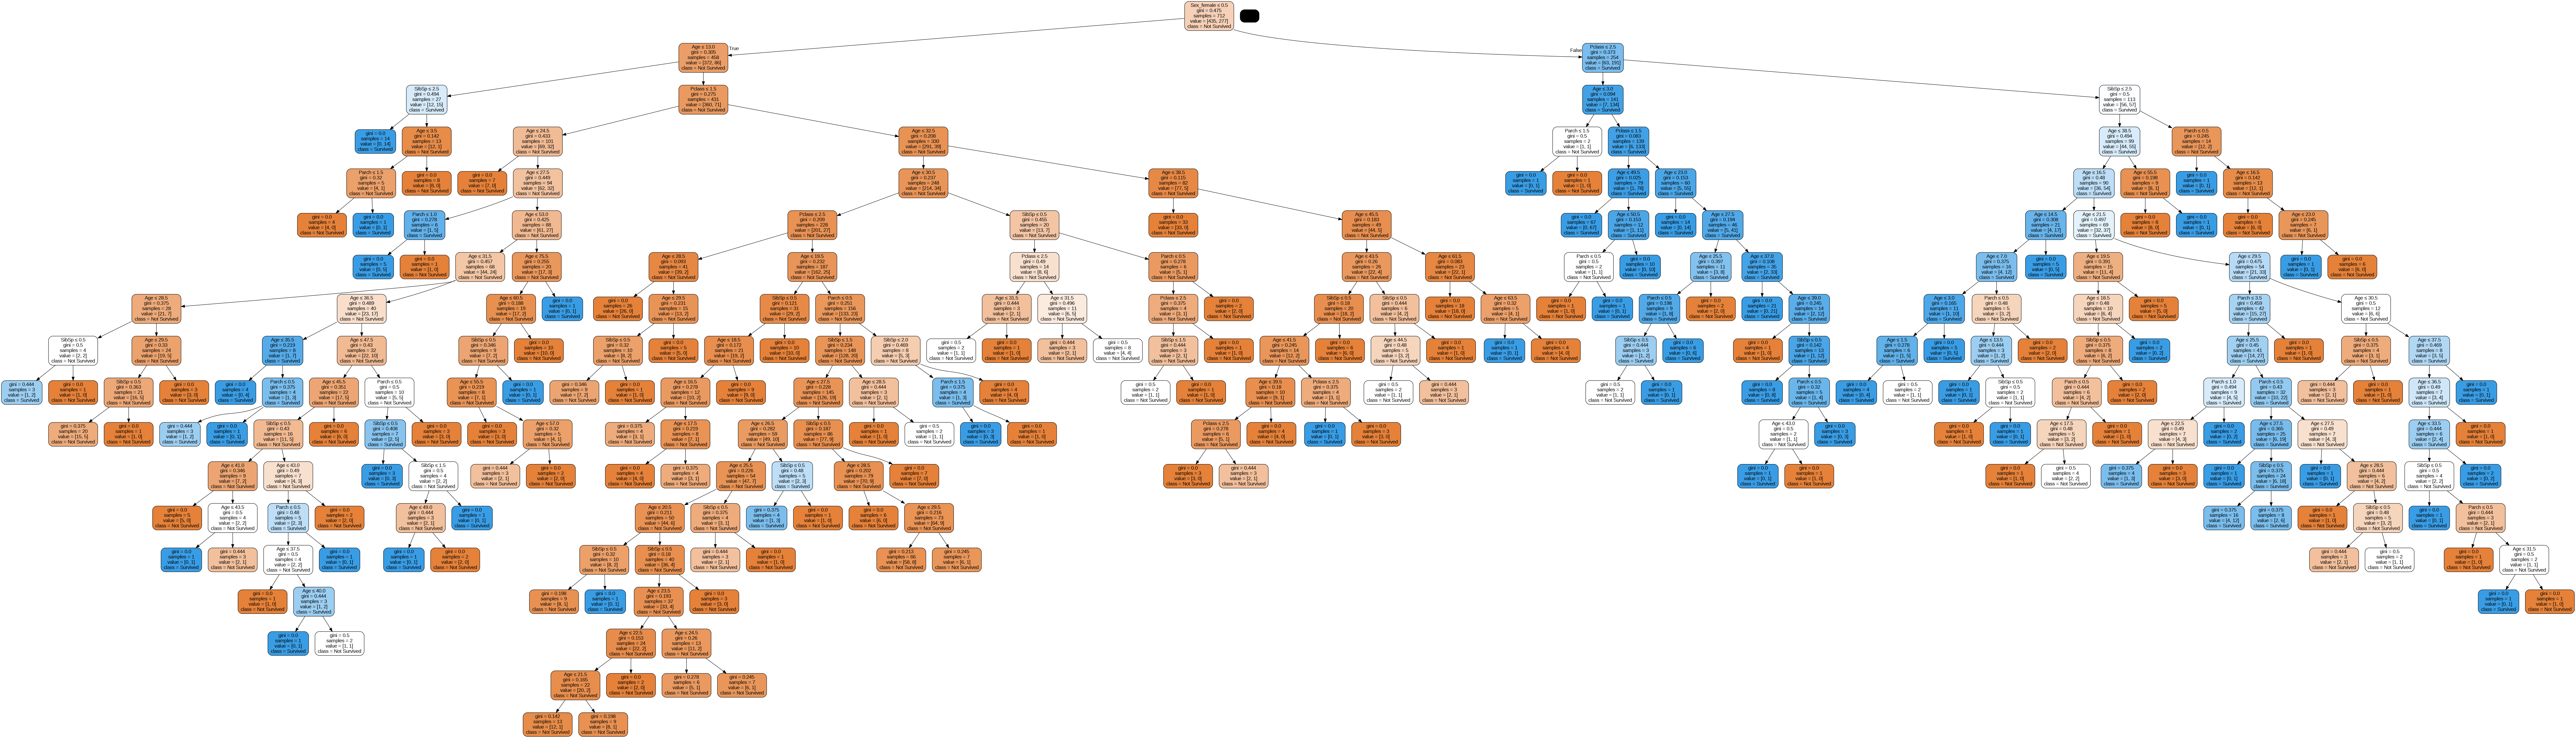

In [129]:
# Alternatively, using GraphViz for better visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=features,
                           class_names=['Not Survived', 'Survived'],
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [125]:
dt_pred = dt_model.predict(X_test)

dt_report = classification_report(y_test, dt_pred)

print(dt_report)

              precision    recall  f1-score   support

          No       0.83      0.88      0.85       114
         Yes       0.76      0.69      0.73        65

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [126]:
# Changing decision tree parameters

dt_model_updated = DecisionTreeClassifier(max_features=None, splitter='best', random_state=84)
dt_model_updated.fit(X_train, y_train)

dt_model_updated_pred = dt_model_updated.predict(X_test)

dt_updated_report = classification_report(y_test, dt_model_updated_pred)

print(dt_updated_report)

              precision    recall  f1-score   support

          No       0.84      0.88      0.86       114
         Yes       0.77      0.71      0.74        65

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



In [135]:
# Using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=42, n_estimators=10)

rfc_model.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)

rfc_report = classification_report(y_test, rfc_pred)

print(rfc_report)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86       114
         Yes       0.80      0.66      0.72        65

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179



In [131]:
# Changing RandomForest parameters

rfc_model_updated = RandomForestClassifier(random_state=136, n_estimators=20)
rfc_model_updated.fit(X_train, y_train)

rfc_model_updated_pred = rfc_model_updated.predict(X_test)

rfc_updated_report = classification_report(y_test, rfc_model_updated_pred)

print(rfc_updated_report)

              precision    recall  f1-score   support

          No       0.84      0.89      0.87       114
         Yes       0.79      0.71      0.75        65

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.83      0.82       179



#Changing the RandomForest parameter n_estimators from 10 to 20 yielded an increase of the models accuracy from 0.82 (82%) to 0.83 (83%)